# Неделя 1, занятие 2. Работа с деревьями

В этом ноутбуке мы разберем работу с деревьями и решим некоторые задачи на эту тему.

In [1]:
# Задаем граф

import networkx as nx

G = nx.Graph()

G.add_edges_from([('A','B'), ('C','A'), ('C','D'), ('C','F'),('D','E')])


nodes=list(G.nodes())
edges=list(G.edges())

print("Список вершин:",nodes)
print("Список ребер:",edges)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Число вершин:",num_nodes)
print("Число ребер:",num_edges)

Список вершин: ['A', 'B', 'C', 'D', 'F', 'E']
Список ребер: [('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'F'), ('D', 'E')]
Число вершин: 6
Число ребер: 5


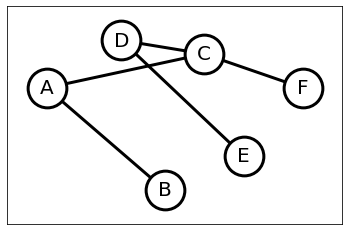

In [2]:
# Рисуем граф

import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}



def draw_G():
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }

    plt.axis([0, 8.5, -0.5, 2.7])

    nx.draw_networkx(G, pos, **options)
    plt.show()
    
draw_G()


True


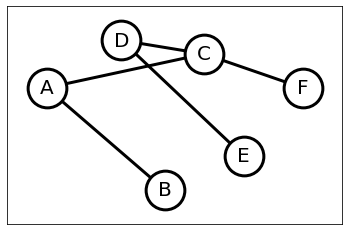

False


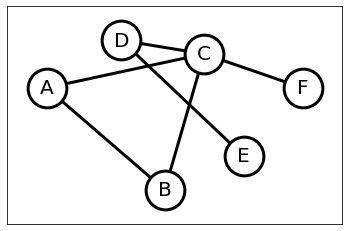

In [3]:
# Проверяем граф на древесность

print(nx.is_tree(G))
draw_G()

G.add_edge('B','C')
print(nx.is_tree(G))
draw_G()
G.remove_edge('B','C')

## Построение дерева с данным набором степеней вершин

В теоретической части мы разобрали несколько задач, в которых нужно было по данному набору чисел понять, можно ли построить дерево с соответствующими степенями вершин. Мы знаем, что есть несколько препятствий к тому, чтобы такое дерево существовало: степени должны быть положительны, их сумма должна быть равна $2n-2$, где $n$ — число вершин. Если же эти ограничения были удовлетворены, нам удавалось построить такое дерево. Оказывается, верно, что указанные ограничения единственно возможные, и если эти условия для набора выполнены, то дерево всегда существует! 

В этом ноутбуке требуется построить дерево с данной последовательностью степеней вершин, если такое дерево существует. На теоретической части занятия мы обсудили как это делать. На каждом шаге достаточно взять вершину степени 1 и соединить с вершиной максимальной степени). Степени соединенных вершин в массиве после этого можно уменьшить на 1, и затем остается лишь повторять эту процедуру.

Реализуйте это решение ниже. Обратите внимание на тонкость: когда вам останется провести последнее ребро важно, чтобы две выбранные для соединения вершины были различны.

In [4]:
# В этом блоке мы соберем полезные комманды, которые могут пригодиться в решении.
# Одну из команд нужно будет реализовать

numbers = [2,2,1,1]

# Эта строка печатает номер ячейки, содержащей единицу

print("Номер ячейки, содержащей 1: ", numbers.index(1))

# Эта строка печатает максимум чисел в списке

print("Максимальное число в numbers: ", max(numbers))

# Добавьте здесь печать номера ячейки, содержащей максимальный элемент списка



Номер ячейки, содержащей 1:  2
Максимальное число в numbers:  2


In [15]:
numbers.index(max(numbers))

0

In [22]:
numbers[numbers.index(max(numbers))+1:]

[2, 1, 1]

In [34]:
# Эта функция будет по данному списку чисел строить дерево с соответствующими степенями вершин

def create_tree(degrees):

    graph = nx.Graph()
    #Добавьте сюда вашу реализацию
    while sum(degrees)>0:
        d1 = degrees.index(1)
        dmax = degrees.index(max(degrees))

        if d1 == dmax:
            subsample =  degrees[dmax+1:]
            dmax += 1 + subsample.index(max(subsample))

        graph.add_edge(str(d1), str(dmax))
        degrees[d1] = 0
        degrees[dmax] -= 1

    return graph

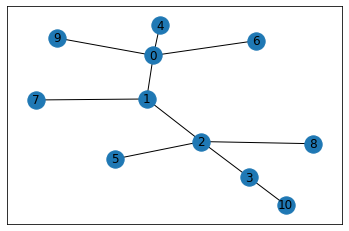

In [35]:
# В этом блоке можно протестировать ваше решение

#G = create_tree([2,2,1,1])

G = create_tree([4, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1])

nx.draw_networkx(G)